In [1]:
!pip install autoviml

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

In [5]:
train=pd.read_csv('train_micro_bussiness.csv')
test=pd.read_csv('test (1)_micro_bussiness.csv')
census=pd.read_csv('census_starter_micro_bussiness.csv')

In [6]:
census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [7]:
train.head(5)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [8]:
# Create a dictionary that maps cfips to state
#state_dict = dict(zip(train['cfips'].unique(), train['state'].unique()))

# Use the dictionary to map cfips values to state values in the train dataset
#test['state'] = test['cfips'].map(state_dict)

In [9]:
test.head(55)

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
5,1011_2022-11-01,1011,2022-11-01
6,1013_2022-11-01,1013,2022-11-01
7,1015_2022-11-01,1015,2022-11-01
8,1017_2022-11-01,1017,2022-11-01
9,1019_2022-11-01,1019,2022-11-01


In [10]:
test.isnull().sum()

row_id                0
cfips                 0
first_day_of_month    0
dtype: int64

In [11]:
test.shape

(25080, 3)

In [12]:
census['cfips'].unique()

array([ 1001,  1003,  1005, ..., 56041, 56043, 56045], dtype=int64)

In [13]:
census.shape

(3142, 26)

In [14]:
train.shape

(122265, 7)

In [15]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [17]:
train.head(100)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
95,1005_2021-01-01,1005,Barbour County,Alabama,2021-01-01,1.111998,223
96,1005_2021-02-01,1005,Barbour County,Alabama,2021-02-01,1.072105,215
97,1005_2021-03-01,1005,Barbour County,Alabama,2021-03-01,1.057146,212
98,1005_2021-04-01,1005,Barbour County,Alabama,2021-04-01,1.102025,221


In [18]:
train.shape

(122265, 7)

In [19]:
train.isnull().sum().sum()

0

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [21]:
final_train=train.merge(census,on='cfips',sort=False,how='left')

In [22]:
final_test=test.merge(census,on='cfips',sort=False,how='left')

In [23]:
final_train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [24]:
final_test.head()

,row_id,cfips,first_day_of_month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,2022-11-01,76.6,78.9,80.6,82.7,85.5,14.5,15.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1003_2022-11-01,1003,2022-11-01,74.5,78.1,81.8,85.1,87.9,20.4,20.7,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,1005_2022-11-01,1005,2022-11-01,57.2,60.4,60.5,64.6,64.6,7.6,7.8,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,1007_2022-11-01,1007,2022-11-01,62.0,66.1,69.2,76.1,74.6,8.1,7.6,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,1009_2022-11-01,1009,2022-11-01,65.8,68.5,73.0,79.6,81.0,8.7,8.1,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [25]:
test.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [26]:
final_train.isnull().sum().sum()

156

In [27]:
final_train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [28]:
df=final_train

In [29]:
df1=final_test

In [30]:
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [31]:
df1.head()

,row_id,cfips,first_day_of_month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,2022-11-01,76.6,78.9,80.6,82.7,85.5,14.5,15.9,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1003_2022-11-01,1003,2022-11-01,74.5,78.1,81.8,85.1,87.9,20.4,20.7,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,1005_2022-11-01,1005,2022-11-01,57.2,60.4,60.5,64.6,64.6,7.6,7.8,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,1007_2022-11-01,1007,2022-11-01,62.0,66.1,69.2,76.1,74.6,8.1,7.6,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,1009_2022-11-01,1009,2022-11-01,65.8,68.5,73.0,79.6,81.0,8.7,8.1,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [32]:
len(df['county'].value_counts())

1871

In [33]:
len(df['state'].value_counts())

51

In [34]:
df.drop('row_id',axis=1,inplace=True)

In [35]:
df1.drop('row_id',axis=1,inplace=True)

In [36]:
df.head()

,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,82.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,82.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,82.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,82.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,82.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [37]:
df.drop(['cfips','county','active','state'],axis=1,inplace=True)

In [38]:
df1.drop(['cfips'],axis=1,inplace=True)

In [39]:
df.head()

,first_day_of_month,microbusiness_density,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,2019-08-01,3.007682,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,2019-09-01,2.884870,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,2019-10-01,3.055843,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,2019-11-01,2.993233,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,2019-12-01,2.993233,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [40]:
df1.head()

,first_day_of_month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,2022-11-01,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,2022-11-01,74.5,78.1,81.8,85.1,87.9,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,2022-11-01,57.2,60.4,60.5,64.6,64.6,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,2022-11-01,62.0,66.1,69.2,76.1,74.6,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,2022-11-01,65.8,68.5,73.0,79.6,81.0,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122265 entries, 0 to 122264
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   first_day_of_month     122265 non-null  object 
 1   microbusiness_density  122265 non-null  float64
 2   pct_bb_2017            122265 non-null  float64
 3   pct_bb_2018            122265 non-null  float64
 4   pct_bb_2019            122265 non-null  float64
 5   pct_bb_2020            122265 non-null  float64
 6   pct_bb_2021            122265 non-null  float64
 7   pct_college_2017       122265 non-null  float64
 8   pct_college_2018       122265 non-null  float64
 9   pct_college_2019       122265 non-null  float64
 10  pct_college_2020       122265 non-null  float64
 11  pct_college_2021       122265 non-null  float64
 12  pct_foreign_born_2017  122265 non-null  float64
 13  pct_foreign_born_2018  122265 non-null  float64
 14  pct_foreign_born_2019  122265 non-nu

In [42]:
df['year']=df['first_day_of_month'].apply(lambda x:x.split('-')[0])

In [43]:
df['month']=df['first_day_of_month'].apply(lambda x:x.split('-')[1])

In [44]:
df['day']=df['first_day_of_month'].apply(lambda x:x.split('-')[2])

In [45]:
df1['year']=df1['first_day_of_month'].apply(lambda x:x.split('-')[0])
df1['month']=df1['first_day_of_month'].apply(lambda x:x.split('-')[1])
df1['day']=df1['first_day_of_month'].apply(lambda x:x.split('-')[2])

In [46]:
df.head()

,first_day_of_month,microbusiness_density,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,2019-08-01,3.007682,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,08,01
1,2019-09-01,2.884870,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,09,01
2,2019-10-01,3.055843,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,10,01
3,2019-11-01,2.993233,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,11,01
4,2019-12-01,2.993233,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,12,01


In [47]:
df1.head()

,first_day_of_month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,2022-11-01,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2022,11,01
1,2022-11-01,74.5,78.1,81.8,85.1,87.9,20.4,20.7,21.0,20.2,...,1.0,1.3,52562,55962.0,58320,61756.0,64346.0,2022,11,01
2,2022-11-01,57.2,60.4,60.5,64.6,64.6,7.6,7.8,7.6,7.3,...,1.1,0.8,33368,34186.0,32525,34990.0,36422.0,2022,11,01
3,2022-11-01,62.0,66.1,69.2,76.1,74.6,8.1,7.6,6.5,7.4,...,1.7,2.1,43404,45340.0,47542,51721.0,54277.0,2022,11,01
4,2022-11-01,65.8,68.5,73.0,79.6,81.0,8.7,8.1,8.6,8.9,...,1.1,0.9,47412,48695.0,49358,48922.0,52830.0,2022,11,01


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122265 entries, 0 to 122264
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   first_day_of_month     122265 non-null  object 
 1   microbusiness_density  122265 non-null  float64
 2   pct_bb_2017            122265 non-null  float64
 3   pct_bb_2018            122265 non-null  float64
 4   pct_bb_2019            122265 non-null  float64
 5   pct_bb_2020            122265 non-null  float64
 6   pct_bb_2021            122265 non-null  float64
 7   pct_college_2017       122265 non-null  float64
 8   pct_college_2018       122265 non-null  float64
 9   pct_college_2019       122265 non-null  float64
 10  pct_college_2020       122265 non-null  float64
 11  pct_college_2021       122265 non-null  float64
 12  pct_foreign_born_2017  122265 non-null  float64
 13  pct_foreign_born_2018  122265 non-null  float64
 14  pct_foreign_born_2019  122265 non-nu

In [49]:
df.drop('first_day_of_month',axis=1,inplace=True)

In [50]:
df1.drop('first_day_of_month',axis=1,inplace=True)

In [51]:
df.head()

,microbusiness_density,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,3.007682,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,08,01
1,2.884870,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,09,01
2,3.055843,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,10,01
3,2.993233,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,11,01
4,2.993233,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,12,01


In [52]:
df1.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2022,11,01
1,74.5,78.1,81.8,85.1,87.9,20.4,20.7,21.0,20.2,20.6,...,1.0,1.3,52562,55962.0,58320,61756.0,64346.0,2022,11,01
2,57.2,60.4,60.5,64.6,64.6,7.6,7.8,7.6,7.3,6.7,...,1.1,0.8,33368,34186.0,32525,34990.0,36422.0,2022,11,01
3,62.0,66.1,69.2,76.1,74.6,8.1,7.6,6.5,7.4,7.9,...,1.7,2.1,43404,45340.0,47542,51721.0,54277.0,2022,11,01
4,65.8,68.5,73.0,79.6,81.0,8.7,8.1,8.6,8.9,9.3,...,1.1,0.9,47412,48695.0,49358,48922.0,52830.0,2022,11,01


In [53]:
y=df['microbusiness_density']

In [54]:
y

0         3.007682
1         2.884870
2         3.055843
3         2.993233
4         2.993233
            ...   
122260    1.803249
122261    1.803249
122262    1.785395
122263    1.785395
122264    1.785395
Name: microbusiness_density, Length: 122265, dtype: float64

In [55]:
df.drop('microbusiness_density',axis=1,inplace=True)

In [56]:
df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,08,01
1,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,09,01
2,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,10,01
3,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,11,01
4,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,12,01


In [57]:
num_cols=[feature for feature in df.columns if df[feature].dtypes!='O']

In [58]:
df[num_cols].head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [59]:
cat_cols=[feature for feature in df.columns if df[feature].dtypes=='O']

In [60]:
df[cat_cols].head()

,year,month,day
0,2019,08,01
1,2019,09,01
2,2019,10,01
3,2019,11,01
4,2019,12,01


In [61]:
x=df

In [62]:
x.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,08,01
1,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,09,01
2,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,10,01
3,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,11,01
4,76.6,78.9,80.6,82.7,85.5,14.5,15.9,16.1,16.7,16.4,...,0.6,1.1,55317,58786.0,58731,57982.0,62660.0,2019,12,01


In [63]:
#from sklearn.decomposition import PCA

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)

In [65]:
x_train.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
65850,74.2,78.8,82.3,82.6,81.8,18.8,18.6,21.1,20.8,22.6,...,0.5,0.6,61769,62545.0,64053,65086.0,69886.0,2021,02,01
86332,83.0,85.4,88.6,89.8,91.3,21.4,21.9,22.4,22.8,24.0,...,2.3,1.6,59152,63680.0,67043,68937.0,74082.0,2021,09,01
23756,72.0,73.2,77.6,82.1,85.3,11.7,11.2,11.6,11.2,11.1,...,0.8,0.9,47468,49233.0,49779,50968.0,54942.0,2020,01,01
67789,65.6,71.9,73.7,71.9,76.2,15.5,17.7,18.3,20.4,19.9,...,1.3,1.7,50270,55170.0,55324,56205.0,58015.0,2020,03,01
83839,63.6,73.3,76.7,80.4,83.0,16.4,18.3,17.6,14.1,13.3,...,0.1,0.7,52930,50037.0,52428,51169.0,53672.0,2021,12,01


In [66]:
x_train.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
65850,74.2,78.8,82.3,82.6,81.8,18.8,18.6,21.1,20.8,22.6,...,0.5,0.6,61769,62545.0,64053,65086.0,69886.0,2021,02,01
86332,83.0,85.4,88.6,89.8,91.3,21.4,21.9,22.4,22.8,24.0,...,2.3,1.6,59152,63680.0,67043,68937.0,74082.0,2021,09,01
23756,72.0,73.2,77.6,82.1,85.3,11.7,11.2,11.6,11.2,11.1,...,0.8,0.9,47468,49233.0,49779,50968.0,54942.0,2020,01,01
67789,65.6,71.9,73.7,71.9,76.2,15.5,17.7,18.3,20.4,19.9,...,1.3,1.7,50270,55170.0,55324,56205.0,58015.0,2020,03,01
83839,63.6,73.3,76.7,80.4,83.0,16.4,18.3,17.6,14.1,13.3,...,0.1,0.7,52930,50037.0,52428,51169.0,53672.0,2021,12,01


In [67]:
x_train.dtypes

pct_bb_2017              float64
pct_bb_2018              float64
pct_bb_2019              float64
pct_bb_2020              float64
pct_bb_2021              float64
pct_college_2017         float64
pct_college_2018         float64
pct_college_2019         float64
pct_college_2020         float64
pct_college_2021         float64
pct_foreign_born_2017    float64
pct_foreign_born_2018    float64
pct_foreign_born_2019    float64
pct_foreign_born_2020    float64
pct_foreign_born_2021    float64
pct_it_workers_2017      float64
pct_it_workers_2018      float64
pct_it_workers_2019      float64
pct_it_workers_2020      float64
pct_it_workers_2021      float64
median_hh_inc_2017         int64
median_hh_inc_2018       float64
median_hh_inc_2019         int64
median_hh_inc_2020       float64
median_hh_inc_2021       float64
year                      object
month                     object
day                       object
dtype: object

In [68]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)

In [69]:
x_train.shape

(85585, 28)

In [70]:
x_test.shape

(36680, 28)

In [71]:
y_train.shape

(85585,)

In [72]:
y_train.head()

65850     1.505117
86332    12.471439
23756     2.217135
67789     2.292877
83839     2.604312
Name: microbusiness_density, dtype: float64

In [73]:
y_test.head()

55332    1.280099
62243    6.607352
43676    5.257680
36785    2.174374
7591     2.283930
Name: microbusiness_density, dtype: float64

In [74]:
categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent',add_indicator=False)),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown = 'ignore'))
    ]
)

numeric_transformer = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median',add_indicator=False)),
        ('scaler', StandardScaler())
    ]
)


In [75]:
ct=ColumnTransformer([
    ('num_cols',numeric_transformer,num_cols),
    ('cat_cols',categorical_transformer,cat_cols)
])

In [76]:
xt=ct.fit_transform(x_train)

In [77]:
pd.DataFrame(xt).head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.440105,0.659230,0.780036,0.491057,0.157954,0.891805,0.814803,1.204286,1.066180,1.327609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.349497,1.374137,1.494931,1.367387,1.366416,1.356518,1.399810,1.432473,1.411828,1.567546,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.212757,0.052643,0.246702,0.430201,0.603177,-0.377218,-0.497032,-0.463238,-0.592933,-0.643305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.448619,-0.088172,-0.195852,-0.811266,-0.554402,0.301978,0.655255,0.712805,0.997050,0.864873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.655299,0.063475,0.144574,0.223290,0.310602,0.462840,0.761620,0.589935,-0.091743,-0.266261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# RandomForestRegressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [80]:
lr_model= Pipeline(steps=[('preprocessor',ct),
                          ('linear',regr)])

In [81]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [82]:
lr_model.score(x_test,y_test)

0.24644101028418064

In [83]:
sample=pd.read_csv('sample_submission (1)_micro_bussiness.csv')

In [84]:
sample.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671


In [85]:
#state_dict = dict(zip(census['cfips'].unique()))

In [86]:
# Create a dictionary that maps cfips to state
#state_dict = dict(zip(census['cfips'].unique()))

# Use the dictionary to map cfips values to state values in the train dataset
#test[''] = test['cfips'].map(state_dict)

In [87]:
pred=lr_model.predict(df1)

In [88]:
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])

In [89]:
predictions.head()

,microbusiness_density
0,4.485442
1,7.055212
2,2.206607
3,2.206607
4,2.206607


In [90]:
sample.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671


In [91]:
sample.drop('microbusiness_density',axis=1,inplace=True)

In [92]:
sample.head()

,row_id
0,1001_2022-11-01
1,1003_2022-11-01
2,1005_2022-11-01
3,1007_2022-11-01
4,1009_2022-11-01


In [93]:
submission_file=sample.join(predictions)

In [94]:
submission_file.head()

,row_id,microbusiness_density
0,1001_2022-11-01,4.485442
1,1003_2022-11-01,7.055212
2,1005_2022-11-01,2.206607
3,1007_2022-11-01,2.206607
4,1009_2022-11-01,2.206607


In [95]:
#submission_file.to_csv('.\\micro_bussiness_pred_1.csv',index=None)

# LinearRegression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr_model= Pipeline(steps=[('preprocessor',ct),
                          ('linear',LinearRegression())])

In [98]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [99]:
lr_model.predict(x_test)

array([1.40554562, 6.70743426, 3.72275494, ..., 0.53835587, 3.05434886,
       1.5020091 ])

In [100]:
lr_model.score(x_test,y_test)

0.2575792348954419

In [101]:
#pred1.to_csv('.\\micro_bussiness_predections.csv',index=None)

# 2 nd Algorithm

# DecisionTreeRegressor

In [102]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

In [103]:
lr_model= Pipeline(steps=[('preprocessor',ct),
                          ('model',regressor)])

In [104]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [105]:
lr_model.score(x_test,y_test)

0.7010500385632764

In [106]:
# predictions

In [107]:
pred=lr_model.predict(df1)

In [108]:
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])

In [109]:
pred1=sample.join(predictions)

In [110]:
pred1.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.442677
1,1003_2022-11-01,8.359798
2,1005_2022-11-01,1.186629
3,1007_2022-11-01,1.253513
4,1009_2022-11-01,1.748417


In [111]:
#pred1.to_csv('.\\micro_bussiness_pred_2.csv',index=None)

In [112]:
# hyper parameters tuning methods

# XGBRegressor

In [113]:
import xgboost
classifier=xgboost.XGBRegressor()
import xgboost
regressor=xgboost.XGBRegressor()

In [114]:
lr_model= Pipeline(steps=[('preprocessor',ct),
                          ('model',regressor)])

In [115]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [116]:
lr_model.predict(x_test)

array([1.5099623, 6.5787325, 4.1100316, ..., 0.900558 , 1.8384418,
       1.5128702], dtype=float32)

In [117]:
lr_model.score(x_test,y_test)

0.8163597607532626

In [118]:
pred=lr_model.predict(df1)
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])
pred1=sample.join(predictions)

In [119]:
pred1.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.551110
1,1003_2022-11-01,7.323042
2,1005_2022-11-01,1.453204
3,1007_2022-11-01,1.364006
4,1009_2022-11-01,2.133040


In [120]:
#pred1.to_csv('.\\micro_bussiness_pred_3.csv',index=None)

# TRAILS

In [121]:
!pip install lazypredict

In [122]:
!pip install pyforest

In [123]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix
# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings

# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

In [124]:
from lazypredict.Supervised import LazyRegressor, LazyClassifier

In [125]:
# LazyClassifier Instance and fiting data
#cls= LazyClassifier(ignore_warnings=False, custom_metric=None)
#models, predictions = cls.fit(X_train, X_test, y_train, y_test)

In [126]:
#reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
#models, predictions = reg.fit(x_train, x_test, y_train, y_test)
#print(models)

# ExtraTreesRegressor

# trail-2

In [127]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor ()

In [128]:
lr_model= Pipeline(steps=[('preprocessor',ct),
                          ('model',model)])

In [129]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [130]:
lr_model.score(x_test,y_test)

0.8002806989086859

In [131]:
pred=lr_model.predict(df1)
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])
pred1=sample.join(predictions)

In [132]:
pred1.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.42
1,1003_2022-11-01,8.22
2,1005_2022-11-01,1.19
3,1007_2022-11-01,1.28
4,1009_2022-11-01,1.75


In [133]:
#pred1.to_csv('.\\micro_bussiness_pred_4.csv',index=None)

# RANSACRegressor

In [134]:
from sklearn.linear_model import RANSACRegressor

In [135]:
reg = RANSACRegressor(random_state=0)

In [136]:
lr_model1= Pipeline(steps=[('preprocessor',ct),
                          ('model',reg)])

In [137]:
lr_model1.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [138]:
lr_model1.score(x_test,y_test)

0.024655272172054987

In [139]:
pred=lr_model1.predict(df1)
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])
pred1=sample.join(predictions)

In [140]:
pred1.head()

,row_id,microbusiness_density
0,1001_2022-11-01,1.79
1,1003_2022-11-01,2.15
2,1005_2022-11-01,-0.06
3,1007_2022-11-01,0.58
4,1009_2022-11-01,1.19


In [141]:
#pred1.to_csv('.\\micro_bussiness_pred_5.csv',index=None)

# DecisionTreeRegressor

In [142]:
dtr=DecisionTreeRegressor()

In [143]:
lr_model1= Pipeline(steps=[('preprocessor',ct),
                          ('model',dtr)])

In [144]:
lr_model1.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pct_bb_2017', 'pct_bb_2018',
                                                   'pct_bb_2019', 'pct_bb_2020',
                                                   'pct_bb_2021',
                                                   'pct_college_2017',
                                                   'pct_college_2018',
                                                   'pct_college_2019',
                                                   'pct_college_2020',
                                                

In [145]:
lr_model1.score(x_test,y_test)

0.776888029527375

In [146]:
pred=lr_model1.predict(df1)
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])
pred1=sample.join(predictions)

In [147]:
pred1.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.44
1,1003_2022-11-01,8.34
2,1005_2022-11-01,1.19
3,1007_2022-11-01,1.25
4,1009_2022-11-01,1.75


In [148]:
#pred1.to_csv('.\\micro_bussiness_predections_7.csv',index=None)

# ANN

In [149]:
!pip install tensorflow

In [150]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc,recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
## For Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline 

In [152]:
x_train.shape

(85585, 28)

In [153]:
lr_model1= Pipeline(steps=[('preprocessor',ct)])

In [154]:
x_train_scaled=lr_model1.fit_transform(x_train)

In [155]:
x_test_scaled=lr_model1.transform(x_test)

In [156]:
x_scaled_train=pd.DataFrame(x_train_scaled)

In [157]:
x_scaled_test=pd.DataFrame(x_test_scaled)

In [158]:
x_scaled_train.shape

(85585, 42)

In [159]:
x_scaled_test.shape

(36680, 42)

In [160]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense



# Defining the model
model = Sequential()
model.add(Dense(64, input_dim=42, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')



In [161]:
# early stoping

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15,verbose=1)

In [162]:
perceptron_model_history =model.fit(x_scaled_train, 
                                                y_train, 
                                                epochs=1000, 
                                                batch_size=30, 
                                                validation_split=0.3,callbacks=early_stopping)

Epoch 1/1000
1997/1997 [==============================] - 9s 4ms/step - loss: 16.1399 - val_loss: 19.4127
Epoch 2/1000
1997/1997 [==============================] - 7s 4ms/step - loss: 14.9145 - val_loss: 18.6104
Epoch 3/1000
1997/1997 [==============================] - 8s 4ms/step - loss: 14.0184 - val_loss: 17.5764
Epoch 4/1000
1997/1997 [==============================] - 7s 4ms/step - loss: 12.9727 - val_loss: 16.5624
Epoch 5/1000
1997/1997 [==============================] - 7s 3ms/step - loss: 11.9976 - val_loss: 15.2956
Epoch 6/1000
1997/1997 [==============================] - 7s 3ms/step - loss: 11.0047 - val_loss: 14.7161
Epoch 7/1000
1997/1997 [==============================] - 7s 3ms/step - loss: 10.1746 - val_loss: 12.8848
Epoch 8/1000
1997/1997 [==============================] - 7s 3ms/step - loss: 9.2258 - val_loss: 12.0561
Epoch 9/1000
1997/1997 [==============================] - 9s 4ms/step - loss: 8.4522 - val_loss: 10.7147
Epoch 10/1000
1997/1997 [=======================

In [163]:
y_pred=model.predict(x_scaled_test)

1147/1147 [==============================] - 2s 2ms/step


In [164]:
y_test.shape

(36680,)

In [165]:
x_scaled_test.shape

(36680, 42)

In [166]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [167]:
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)

In [168]:
mae

0.9085034723196977

In [169]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


# mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# mean squared error
mse = mean_squared_error(y_test, y_pred)

# root mean squared error
rmse = np.sqrt(mse)

# R^2 (coefficient of determination) regression score function.
r2 = r2_score(y_test, y_pred)


In [170]:
print('mae =',mae)
print('mse =',mse)
print('r2 score =',r2)

mae = 0.9085034723196977
mse = 5.996124932624226
r2 score = 0.7724764272786842


In [171]:
df1.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2022,11,01
1,74.50,78.10,81.80,85.10,87.90,20.40,20.70,21.00,20.20,20.60,3.20,3.40,3.70,3.40,3.50,1.40,1.30,1.40,1.00,1.30,52562,55962.00,58320,61756.00,64346.00,2022,11,01
2,57.20,60.40,60.50,64.60,64.60,7.60,7.80,7.60,7.30,6.70,2.70,2.50,2.70,2.60,2.60,0.50,0.30,0.80,1.10,0.80,33368,34186.00,32525,34990.00,36422.00,2022,11,01
3,62.00,66.10,69.20,76.10,74.60,8.10,7.60,6.50,7.40,7.90,1.00,1.40,1.50,1.60,1.10,1.20,1.40,1.60,1.70,2.10,43404,45340.00,47542,51721.00,54277.00,2022,11,01
4,65.80,68.50,73.00,79.60,81.00,8.70,8.10,8.60,8.90,9.30,4.50,4.40,4.50,4.40,4.50,1.30,1.40,0.90,1.10,0.90,47412,48695.00,49358,48922.00,52830.00,2022,11,01


In [172]:
lr_model1= Pipeline(steps=[('preprocessor',ct)])

In [173]:
df1_test_data=lr_model1.transform(df1)

In [174]:
pred=model.predict(df1_test_data)

784/784 [==============================] - 1s 2ms/step


In [175]:
pred=model.predict(df1_test_data)
predictions=pd.DataFrame(pred,columns=['microbusiness_density'])
pred1=sample.join(predictions)

784/784 [==============================] - 2s 2ms/step


In [176]:
pred1.head()

,row_id,microbusiness_density
0,1001_2022-11-01,2.50
1,1003_2022-11-01,7.53
2,1005_2022-11-01,1.73
3,1007_2022-11-01,1.89
4,1009_2022-11-01,1.19


In [177]:
#pred1.to_csv('.\\micro_bussiness_pred_6.csv',index=None)

In [178]:
df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2019,08,01
1,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2019,09,01
2,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2019,10,01
3,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2019,11,01
4,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2019,12,01


In [179]:
df1.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,58786.00,58731,57982.00,62660.00,2022,11,01
1,74.50,78.10,81.80,85.10,87.90,20.40,20.70,21.00,20.20,20.60,3.20,3.40,3.70,3.40,3.50,1.40,1.30,1.40,1.00,1.30,52562,55962.00,58320,61756.00,64346.00,2022,11,01
2,57.20,60.40,60.50,64.60,64.60,7.60,7.80,7.60,7.30,6.70,2.70,2.50,2.70,2.60,2.60,0.50,0.30,0.80,1.10,0.80,33368,34186.00,32525,34990.00,36422.00,2022,11,01
3,62.00,66.10,69.20,76.10,74.60,8.10,7.60,6.50,7.40,7.90,1.00,1.40,1.50,1.60,1.10,1.20,1.40,1.60,1.70,2.10,43404,45340.00,47542,51721.00,54277.00,2022,11,01
4,65.80,68.50,73.00,79.60,81.00,8.70,8.10,8.60,8.90,9.30,4.50,4.40,4.50,4.40,4.50,1.30,1.40,0.90,1.10,0.90,47412,48695.00,49358,48922.00,52830.00,2022,11,01


# TIME SERIES MODEL

# ARIMA MODEL

In [232]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [233]:
train=pd.read_csv('train_micro_bussiness.csv')
test=pd.read_csv('test (1)_micro_bussiness.csv')
census=pd.read_csv('census_starter_micro_bussiness.csv')

In [234]:
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.01,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.88,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.06,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.99,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.99,1243


In [235]:
train_df=train.sort_values('first_day_of_month')

In [236]:
train_df['first_day_of_month']=pd.to_datetime(train_df['first_day_of_month'])

In [237]:
train_df.set_index('first_day_of_month',inplace=True)

In [238]:
train_df.drop(['row_id','cfips','county','state','active'],axis=1,inplace=True)

In [239]:
train_df.head()

,microbusiness_density
first_day_of_month,
2019-08-01,3.01
2019-08-01,0.34
2019-08-01,5.73
2019-08-01,1.87
2019-08-01,0.53


In [240]:
test.drop(['row_id','cfips'],axis=1,inplace=True)

In [241]:
test.head()

,first_day_of_month
0,2022-11-01
1,2022-11-01
2,2022-11-01
3,2022-11-01
4,2022-11-01


<AxesSubplot:xlabel='first_day_of_month'>

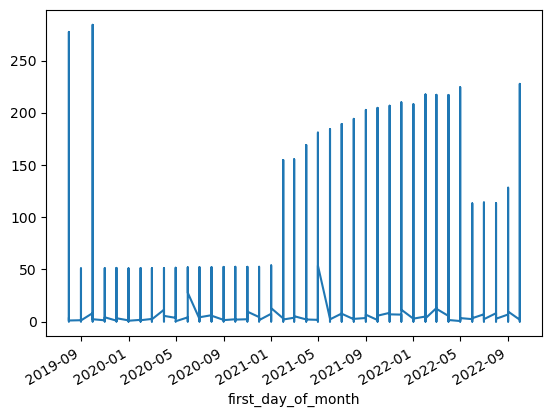

In [242]:
# PLOT YOUR DATA
train_df['microbusiness_density'].plot()

In [243]:
# CHECKING OUR DATA SET IS STATIONARY OR NOT

from statsmodels.tsa.stattools import adfuller

def adfuller_test(dataset):
    dftest=adfuller(dataset,autolag ='AIC')
    print('1. adf :',dftest[0])
    print('2. p-value :',dftest[1])
    print('3. Num of lags :',dftest[2])
    print('4. Number of observations used for ADF Regression and critical values calculatio :',dftest[3])
    print('5. Critical values :')
    for key,val in dftest[4].items():
        print('\t',key,':',val)
    
    
    
# if p value is less than 0.05 --  OUR DATA IS NOT SEASONALLY
# IF P VALUES IS MORE THAN 0.05 -- OUR MODE IS SEASONAL

In [244]:
adfuller_test(train_df['microbusiness_density'])

1. adf : -32.722223064671304
2. p-value : 0.0
3. Num of lags : 71
4. Number of observations used for ADF Regression and critical values calculatio : 122193
5. Critical values :
	 1% : -3.430403517283135
	 5% : -2.861563653848034
	 10% : -2.5667825901073567


In [245]:
# FIGURE OUT ORDER FOR ARIMA MODEL p,d,q

In [246]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [247]:
#stepwise_fit=auto_arima(train_df['microbusiness_density'],trace=True,suppress_warnings=True)

In [248]:
from statsmodels.tsa.arima_model import ARIMA

In [249]:
train_df.head()

,microbusiness_density
first_day_of_month,
2019-08-01,3.01
2019-08-01,0.34
2019-08-01,5.73
2019-08-01,1.87
2019-08-01,0.53


In [250]:
#train.drop(['row_id','cfips','county','state','active'],axis=1,inplace=True)

In [251]:
train_df1,test_df=train_test_split(train_df,test_size=0.3,random_state=1111)

In [252]:
train_df.shape

(122265, 1)

In [253]:
test_df.shape

(36680, 1)

In [254]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.tsa.SARIMAX as SARIMAX

# Use ARIMA
#model = arima.ARIMA(endog=your_data, order=your_order)
#results = model.fit()

# Use SARIMAX
#model = SARIMAX(endog=your_data, order=your_order, seasonal_order=your_seasonal_order)
#results = model.fit()


In [255]:
model=ARIMA(train_df['microbusiness_density'],order=(5,1,0))

In [256]:
results=model.fit()

In [257]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     microbusiness_density   No. Observations:               122265
Model:                    ARIMA(5, 1, 0)   Log Likelihood             -378945.951
Date:                   Thu, 02 Feb 2023   AIC                         757903.903
Time:                           21:29:36   BIC                         757962.186
Sample:                                0   HQIC                        757921.432
                                - 122265                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8364      0.001  -1135.111      0.000      -0.838      -0.835
ar.L2         -0.6750      0.001   -708.109      0.000      -0.677      -0.673
ar.L3         -0.5078      0.001   -507.894      0.000      -0.510      -0.506
ar.L4         -0.3395      0.001   -364.428      0.000      -0.341      -0.338
ar.L5         -0.1720      0.001   -238.023      0.000      -0.173      -0.171
sigma2        28.8169      0.008   3574.132      0.000      28.801      28.833
===================================================================================
Ljung-Box (L1) (Q):                  75.87   Jarque-Bera (JB):         888794363.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            12.44
Prob(H) (two-sided):                  0.00   Kurtosis:                       419.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [258]:
# make predictions on test data set

start=len(train_df)
end=len(train_df)+len(test_df)-1

In [259]:
start

122265

In [260]:
end

158944

In [261]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     microbusiness_density   No. Observations:               122265
Model:                    ARIMA(5, 1, 0)   Log Likelihood             -378945.951
Date:                   Thu, 02 Feb 2023   AIC                         757903.903
Time:                           21:29:42   BIC                         757962.186
Sample:                                0   HQIC                        757921.432
                                - 122265                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8364      0.001  -1135.111      0.000      -0.838      -0.835
ar.L2         -0.6750      0.001   -708.109      0.000      -0.677      -0.673
ar.L3         -0.5078      0.001   -507.894      0.000      -0.510      -0.506
ar.L4         -0.3395      0.001   -364.428      0.000      -0.341      -0.338
ar.L5         -0.1720      0.001   -238.023      0.000      -0.173      -0.171
sigma2        28.8169      0.008   3574.132      0.000      28.801      28.833
===================================================================================
Ljung-Box (L1) (Q):                  75.87   Jarque-Bera (JB):         888794363.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            12.44
Prob(H) (two-sided):                  0.00   Kurtosis:                       419.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [262]:
pred=results.predict(start=start, end=end, type='levels',dynamic=True, params=results.params)

In [263]:
#pred.index=train_df.index[start:end+1]

<AxesSubplot:xlabel='first_day_of_month'>

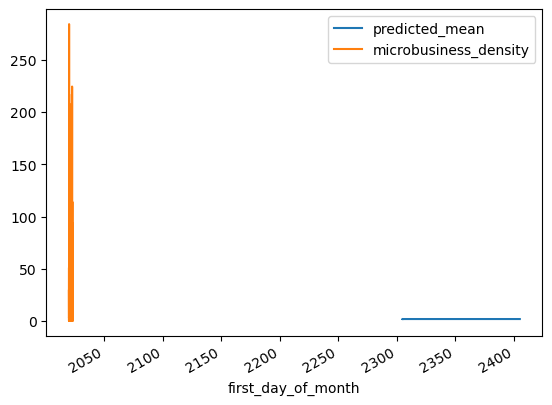

In [264]:
pred.plot(legend=True)
test_df['microbusiness_density'].plot(legend=True)

In [265]:
test_df['microbusiness_density'].mean()

3.8455904149062214

In [266]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test_df['microbusiness_density']))
print(rmse)

5.74397122540041


In [267]:
model2=ARIMA(train_df['microbusiness_density'],order=(5,1,0))
model2=model2.fit()
train_df.tail()

,microbusiness_density
first_day_of_month,
2022-10-01,1.64
2022-10-01,2.52
2022-10-01,1.59
2022-10-01,1.50
2022-10-01,1.79


In [268]:
test.head()

,first_day_of_month
0,2022-11-01
1,2022-11-01
2,2022-11-01
3,2022-11-01
4,2022-11-01


In [269]:
test.tail()

,first_day_of_month
25075,2023-06-01
25076,2023-06-01
25077,2023-06-01
25078,2023-06-01
25079,2023-06-01


In [364]:
# FOR FUTURE DATA PREDICTION
#index_future_dates=pd.date_range(start='2022-11-01',end='2023-06-01')
pred=model2.predict(start=len(train_df),end=len(train_df)+25079,type='levels')
#pred.index=index_future_dates

In [365]:
df = pred.to_frame()

In [367]:
df=df.reset_index(drop=True)

In [368]:
df.head()

,predicted_mean
0,1.77
1,1.80
2,1.83
3,1.71
4,1.73


In [369]:
sample=pd.read_csv('sample_submission (1)_micro_bussiness.csv')

In [370]:
sample.drop('microbusiness_density',axis=1,inplace=True)

In [360]:
#df.to_csv('.\\time series_predictions.csv',index=None)

In [371]:
df =df.rename(columns={'predicted_mean': 'microbusiness_density'})

In [372]:
df.head()

,microbusiness_density
0,1.77
1,1.80
2,1.83
3,1.71
4,1.73


In [374]:
pred=sample.join(df)

In [379]:
pred.to_csv('.\\micro_bussiness_pred_8.csv',index=None)

In [376]:
pred.head()

,row_id,microbusiness_density
0,1001_2022-11-01,1.77
1,1003_2022-11-01,1.80
2,1005_2022-11-01,1.83
3,1007_2022-11-01,1.71
4,1009_2022-11-01,1.73


In [378]:
pred.isnull().sum()

row_id                   0
microbusiness_density    0
dtype: int64